In [305]:
# imports n' shit
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import find_peaks, peak_prominences
import math as math
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.optimize import curve_fit, minimize_scalar

# Ba-133
df1 = pd.read_csv('Burger Dam Ba 133.txt', skiprows = 1, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Cd-109
df2 = pd.read_csv('Burger Dam Cd 109.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Co-60
df3 = pd.read_csv('Burger Dam Co 60.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Mn-54
df4 = pd.read_csv('Burger Dam Mn 54.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Na-22
df5 = pd.read_csv('Burger Dam Na 22.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Unknown
df6 = pd.read_csv('Burger Dam Unknown.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

print(df1)
print(df2)
print(df3)
print(df4)
print(df5)
print(df6)

      Channel    Energy    Counts          Rate
0           1   -23.078       643      2.143330
1           2   -21.036      1334      4.446670
2           3   -18.994   2105787   7019.290000
3           4   -16.952  19652536  65508.500000
4           5   -14.910   4531744  15105.800000
...       ...       ...       ...           ...
1019     1020  2057.890         0      0.000000
1020     1021  2059.933         0      0.000000
1021     1022  2061.975         1      0.003333
1022     1023  2064.017         0      0.000000
1023     1024  2066.059         0      0.000000

[1024 rows x 4 columns]
      Channel    Energy    Counts          Rate
0           1   -23.078       814      2.713330
1           2   -21.036      1489      4.963330
2           3   -18.994   1360128   4533.760000
3           4   -16.952  28338559  94461.900000
4           5   -14.910   7589684  25298.900000
...       ...       ...       ...           ...
1019     1020  2057.890         1      0.003333
1020     1021  

In [332]:
# Reformat data from pd to np

data1 = np.asarray(df1)
data1.shape

data2 = np.asarray(df2)
data2.shape

data3 = np.asarray(df3)
data3.shape

data4 = np.asarray(df4)
data4.shape

data5 = np.asarray(df5)
data5.shape

data6 = np.asarray(df6)
data6.shape

Channel1 = data1[:,1]
Energy1 = data1[:,2]
Counts1 = data1[:,3]

Channel2 = data2[:,1]
Energy2 = data2[:,2]
Counts2 = data2[:,3]

Channel3 = data3[:,1]
Energy3 = data3[:,2]
Counts3 = data3[:,3]

Channel4 = data4[:,1]
Energy4 = data4[:,2]
Counts4 = data4[:,3]

Channel5 = data5[:,1]
Energy5 = data5[:,2]
Counts5 = data5[:,3]

Channel6 = data6[:,1]
Energy6 = data6[:,2]
Counts6 = data6[:,3]


print(data1)
print(data2)
print(data3)
print(data4)
print(data5)
print(data6)

[[ 1.000000e+00 -2.307800e+01  6.430000e+02  2.143330e+00]
 [ 2.000000e+00 -2.103600e+01  1.334000e+03  4.446670e+00]
 [ 3.000000e+00 -1.899400e+01  2.105787e+06  7.019290e+03]
 ...
 [ 1.022000e+03  2.061975e+03  1.000000e+00  3.333330e-03]
 [ 1.023000e+03  2.064017e+03  0.000000e+00  0.000000e+00]
 [ 1.024000e+03  2.066059e+03  0.000000e+00  0.000000e+00]]
[[ 1.000000e+00 -2.307800e+01  8.140000e+02  2.713330e+00]
 [ 2.000000e+00 -2.103600e+01  1.489000e+03  4.963330e+00]
 [ 3.000000e+00 -1.899400e+01  1.360128e+06  4.533760e+03]
 ...
 [ 1.022000e+03  2.061975e+03  1.000000e+00  3.333330e-03]
 [ 1.023000e+03  2.064017e+03  1.000000e+00  3.333330e-03]
 [ 1.024000e+03  2.066059e+03  0.000000e+00  0.000000e+00]]
[[ 1.000000e+00 -2.307800e+01  9.870000e+02  3.290000e+00]
 [ 2.000000e+00 -2.103600e+01  3.471000e+03  1.157000e+01]
 [ 3.000000e+00 -1.899400e+01  1.761821e+06  5.872740e+03]
 ...
 [ 1.022000e+03  2.061975e+03  1.820000e+02  6.066670e-01]
 [ 1.023000e+03  2.064017e+03  1.950000

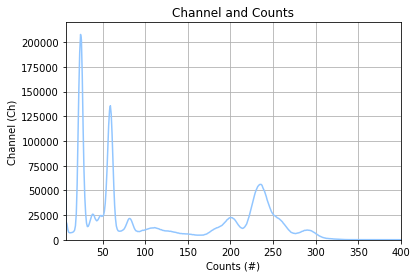

In [333]:
# Plot for Ba-133 Channel & Counts

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(7, 400)
pylab.ylim(0, 220000)
plt.grid()

plt.plot(df1.Channel, df1.Counts)

[1.31221620e+04 8.15148399e+01 3.34899860e+00 8.63277921e+03]


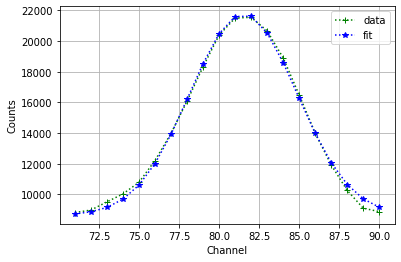

In [334]:
x1 = df1.Channel [70:90]
y1 = df1.Counts [70:90]

n=sum(y1)
mean = sum(x1*y1)/n                   
sigma=math.sqrt(sum(y1*(x1-mean)**2)/n)


def gaus(x1,a,x0,sigma,offset):
    return a*exp(-(x1-x0)**2/(2*sigma**2))+offset

popt,pcov = curve_fit(gaus,x1,y1,p0=[1,mean,sigma, 0.0])
print(popt)

plt.plot(x1,y1,'g+:',label='data')
plt.plot(x1,gaus(x1,*popt),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


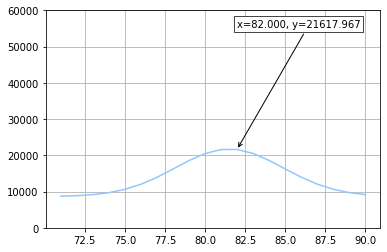

In [335]:
fig, ax = plt.subplots()
ax.plot(x1,gaus(x1,*popt))

def annot_max(x1,y1, ax=None):
    xmax = x1[np.argmax(gaus(x1,*popt))]
    ymax = gaus(x1,*popt).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x1,y1)


ax.set_ylim(0,60000)
plt.grid()
plt.show()

[10363.1914404    289.44156781    11.83663431  -558.9314843 ]


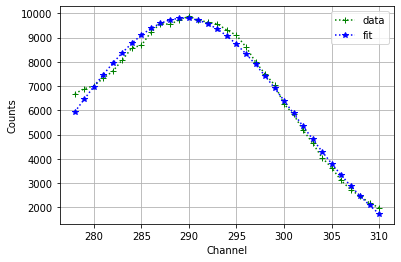

In [340]:
x1_1 = df1.Channel [277:310]
y1_1 = df1.Counts [277:310]

n=sum(y1_1)
mean = sum(x1_1*y1_1)/n                   
sigma=math.sqrt(sum(y1_1*(x1_1-mean)**2)/n)


def gaus(x1_1,a,x0,sigma,offset):
    return a*exp(-(x1_1-x0)**2/(2*sigma**2))+offset

popt,pcov = curve_fit(gaus,x1_1,y1_1,p0=[1,mean,sigma, 0.0])
print(popt)

plt.plot(x1_1,y1_1,'g+:',label='data')
plt.plot(x1_1,gaus(x1_1,*popt),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

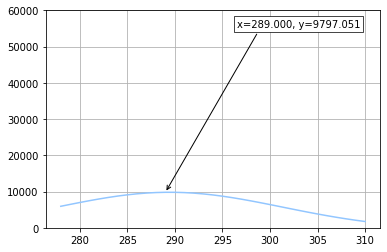

In [341]:
fig, ax = plt.subplots()
ax.plot(x1_1,gaus(x1_1,*popt))

def annot_max(x1_1,y1_1, ax=None):
    xmax = x1_1[np.argmax(gaus(x1_1,*popt))]
    ymax = gaus(x1_1,*popt).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x1_1,y1_1)


ax.set_ylim(0,60000)
plt.grid()
plt.show()

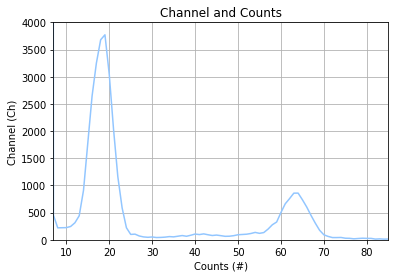

In [310]:
# Plot for Cd-109 Channel & Counts

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(7, 85)
pylab.ylim(0, 4000)
plt.grid()

plt.plot(df2.Channel, df2.Counts)

[785.80059768  63.27908313   3.00086174  72.61420747]


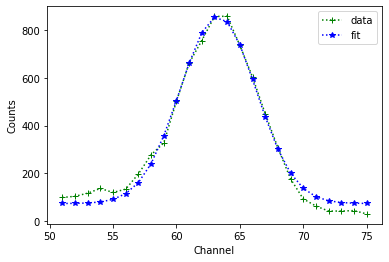

In [311]:
x2 = df2.Channel[50:75]
y2 = df2.Counts [50:75]

n=sum(y2)
mean = sum(x2*y2)/n                   
sigma=math.sqrt(sum(y2*(x2-mean)**2)/n)


def gaus(x2,a,x0,sigma,offset):
    return a*exp(-(x2-x0)**2/(2*sigma**2))+offset

popt,pcov = curve_fit(gaus,x2,y2,p0=[1,mean,sigma, 0.0])
print(popt)

plt.plot(x2,y2,'g+:',label='data')
plt.plot(x2,gaus(x2,*popt),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


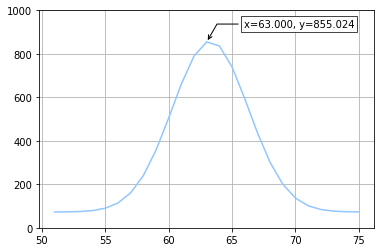

In [312]:
fig, ax = plt.subplots()
ax.plot(x2,gaus(x2,*popt))

def annot_max(x2,y2, ax=None):
    xmax = x2[np.argmax(gaus(x2,*popt))]
    ymax = gaus(x2,*popt).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x2,y2)


ax.set_ylim(0,1000)
plt.grid()
plt.show()

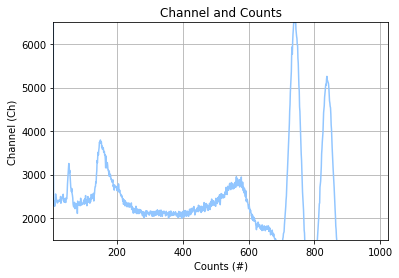

In [325]:
# Plot for Co-60 Channel & Counts, ignoring backscatter, note the x-axis bounds.
# redo data collection for CO-60 !!

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(7, 1024)
pylab.ylim(1500, 6500)
plt.grid()

plt.plot(df3.Channel, df3.Counts)

[1440.62875989  552.32218065   53.1247921  1357.73463711]


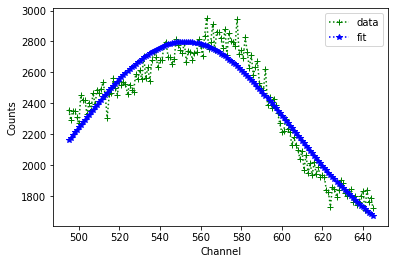

In [314]:
x3 = df3.Channel[494:645]
y3 = df3.Counts [494:645]

n=sum(y3)
mean = sum(x3*y3)/n                   
sigma=math.sqrt(sum(y3*(x3-mean)**2)/n)


def gaus(x3,a,x0,sigma,offset):
    return a*exp(-(x3-x0)**2/(2*sigma**2))+offset

popt,pcov = curve_fit(gaus,x3,y3,p0=[1,mean,sigma, 0.0])
print(popt)

plt.plot(x3,y3,'g+:',label='data')
plt.plot(x3,gaus(x3,*popt),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

In [315]:
fig, ax = plt.subplots()
ax.plot(x3,gaus(x3,*popt))

def annot_max(x3,y3, ax=None):
    xmax = x3[np.argmax(gaus(x3,*popt))]
    ymax = gaus(x3,*popt).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x3,y3)


ax.set_ylim(0,3000)
plt.grid()
plt.show()

SyntaxError: invalid syntax (<ipython-input-315-f740c2f49d11>, line 5)

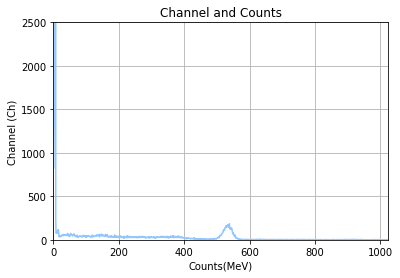

In [316]:
# Plot of Mn-54 Channel and Counts

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts(MeV)')
pylab.xlim(0, 1024)
pylab.ylim(0, 2500)
plt.grid()

plt.plot(df4.Channel, df4.Counts)

[156.61089662 532.96764233  13.41514676   5.22453416]


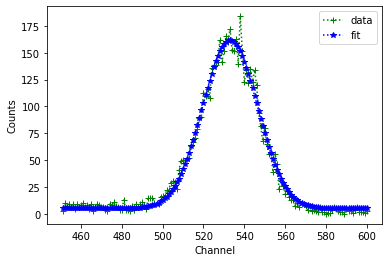

In [317]:
x4 = df4.Channel[450:600]
y4 = df4.Counts [450:600]

n=sum(y4)
mean = sum(x4*y4)/n                   
sigma=math.sqrt(sum(y4*(x4-mean)**2)/n)


def gaus(x4,a,x0,sigma,offset):
    return a*exp(-(x4-x0)**2/(2*sigma**2))+offset

popt,pcov = curve_fit(gaus,x4,y4,p0=[1,mean,sigma, 0.0])
print(popt)

plt.plot(x4,y4,'g+:',label='data')
plt.plot(x4,gaus(x4,*popt),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


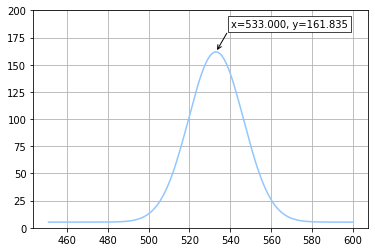

In [318]:
fig, ax = plt.subplots()
ax.plot(x4,gaus(x4,*popt))

def annot_max(x4,y4, ax=None):
    xmax = x4[np.argmax(gaus(x4,*popt))]
    ymax = gaus(x4,*popt).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x4,y4)


ax.set_ylim(0,200)
plt.grid()
plt.show()

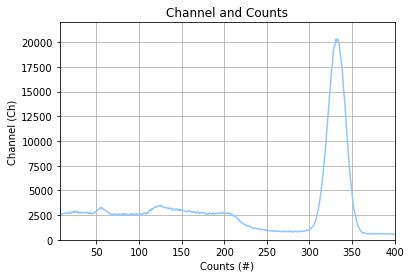

In [319]:
# Plot for Na-22 Channel & Counts, ignoring backscatter.

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(7, 400)
pylab.ylim(0, 22000)
plt.grid()

plt.plot(df5.Channel, df5.Counts)

[1.97547631e+04 3.31995301e+02 1.03031637e+01 6.09805484e+02]


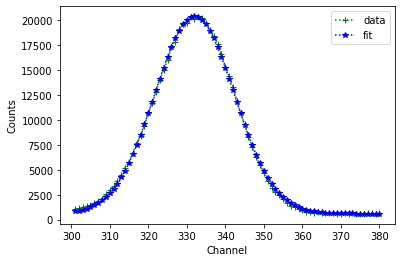

In [320]:
x5 = df5.Channel[300:380]
y5 = df5.Counts [300:380]

n=sum(y5)
mean = sum(x5*y5)/n                   
sigma=math.sqrt(sum(y5*(x5-mean)**2)/n)


def gaus(x5,a,x0,sigma,offset):
    return a*exp(-(x5-x0)**2/(2*sigma**2))+offset

popt,pcov = curve_fit(gaus,x5,y5,p0=[1,mean,sigma, 0.0])
print(popt)

plt.plot(x5,y5,'g+:',label='data')
plt.plot(x5,gaus(x5,*popt),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


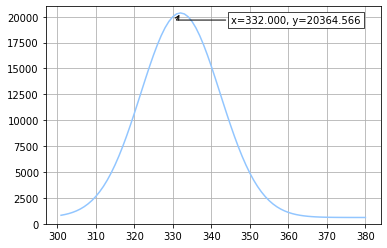

In [321]:
fig, ax = plt.subplots()
ax.plot(x5,gaus(x5,*popt))

def annot_max(x5,y5, ax=None):
    xmax = x5[np.argmax(gaus(x5,*popt))]
    ymax = gaus(x5,*popt).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x5,y5)


ax.set_ylim(0,21000)
plt.grid()
plt.show()

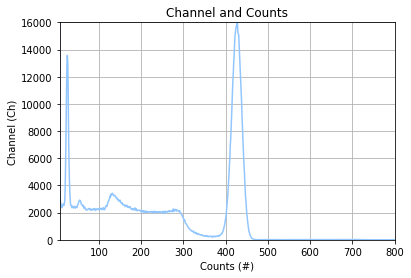

In [322]:
# Plot for Unknown Channel & Counts, ignoring backscatter.

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(7, 800)
pylab.ylim(0, 16000)
plt.grid()

plt.plot(df6.Channel, df6.Counts)

[1.58000967e+04 4.26385456e+02 1.17388252e+01 1.05395698e+02]


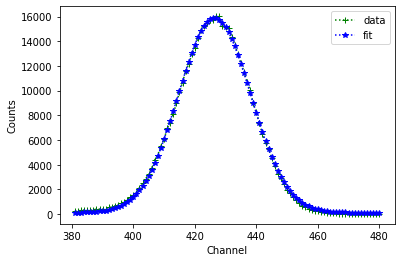

In [323]:
x6 = df6.Channel[380:480]
y6 = df6.Counts [380:480]

n=sum(y6)
mean = sum(x6*y6)/n                   
sigma=math.sqrt(sum(y6*(x6-mean)**2)/n)


def gaus(x6,a,x0,sigma,offset):
    return a*exp(-(x6-x0)**2/(2*sigma**2))+offset

popt,pcov = curve_fit(gaus,x6,y6,p0=[1,mean,sigma, 0.0])
print(popt)

plt.plot(x6,y6,'g+:',label='data')
plt.plot(x6,gaus(x6,*popt),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


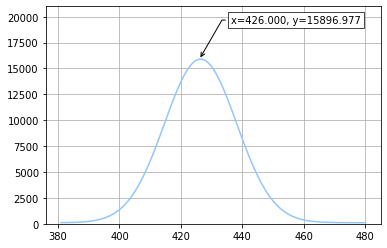

In [324]:
fig, ax = plt.subplots()
ax.plot(x6,gaus(x6,*popt))

def annot_max(x6,y6, ax=None):
    xmax = x6[np.argmax(gaus(x6,*popt))]
    ymax = gaus(x6,*popt).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x6,y6)


ax.set_ylim(0,21000)
plt.grid()
plt.show()

In [ ]:
# 